<a href="https://colab.research.google.com/github/ayportella/05-sql/blob/main/35_credit_data_exploratory_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Projeto Análise Exploratória de Dados de Crédito** 

Esse projeto faz parte do módulo final de SQL do curso Análise de Dados da EBAC. Nele irei mostrar os principais comandos aprendidos e tentar explorar os dados, assim como desenvolver storytelling, a fim de extrair conclusões sobre esses dados que possam ajudar numa tomada de decisões e em melhorias de planos de negócio.

**Quais são os dados explorados?**

Os dados que serão mostrados e explorados são informações de clientes de um banco de dados, sendo as colunas as seguintes:



*   idade = idade do cliente
*   sexo = sexo do cliente (F ou M)
*   dependentes = quantidade de dependentes do cliente
*   escolaridade = nível de escolaridade do cliente
*   estado_civil = se o(a) cliente é casado(a) ou solteiro(a)
*   salario_anual = faixa salarial do cliente
*   tipo_cartao = tipo do cartao do cliente
*   qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
*   iteracoes_12m = quantidade de iterações/transações nos últimos 12 meses
*   meses_inativo_12m = quantidade de meses que o cliente ficou inativo
*   limite_credito = limite de crédito do cliente
*   valor_transacoes_12m = valor das transações dos últimos 12 meses
*   qtd_transacoes_12m = quantidade de transacoes dos últimos 12 meses

Ou seja, nossa tabela de dados terá 13 colunas (pelo menos, caso não sejam criadas mais nenhuma coluna).

A plataforma utilizada para a criação e manipulação da tabela foi o **AWS Athena** em conjunto com o **S3 Bucket**.
Existe uma versão dos dados disponibilizados em https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset



# **Exploração de Dados**

Nessa primeira parte, mostrarei como criar a tabela de dados no Athena AWS: 

```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito ( 
  `idade` int,
  `sexo` string,
  `dependentes` int,
  `escolaridade` string,
  `estado_civil` string,
  `salario_anual` string,
  `tipo_cartao` string, 
  `qtd_produtos` bigint,
  `iteracoes_12m` int,
  `meses_inativo_12m` int,
  `limite_credito` float,
  `valor_transacoes_12m` float,
  `qtd_transacoes_12m` int 
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ','
) LOCATION 's3://ebac-ayp-modulo8/'
TBLPROPERTIES ('has_encrypted_data'='false');
```
Com a tabela criada, iremos para a segunda parte: do que é composto o dado bruto? 

**Qual a quantidade de linhas, ou seja, de clientes diferentes, que nossa base de dados tem?**

**Query:** 

SELECT <br /> count(*) <br /> FROM credito

    Resposta:2564 linhas

obs.: A base de dados original do link acima contém 10127 linhas. Desse número total de dados, foram escolhidas apenas 2564 linhas devido a limites computacionais e financeiros da AWS, porém entende-se que quanto maior a quantidade de dados utilizada, mais confiável será a análise.

**Uma rápida visualização dos dados!**

**Query:** 

SELECT * <br /> FROM credito <br /> LIMIT 10


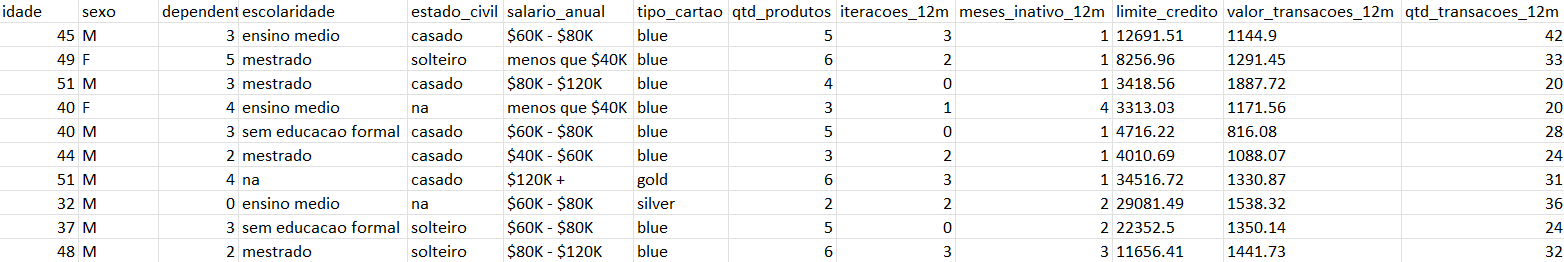

**Quais são os tipos de cada dado?**

**Query:** DESCRIBE credito

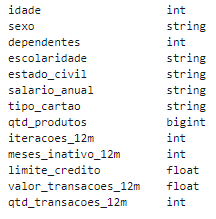

**Quais são os tipos de escolaridade disponíveis no dataset?**

**Query:** 

SELECT DISTINCT <br /> escolaridade <br /> FROM credito

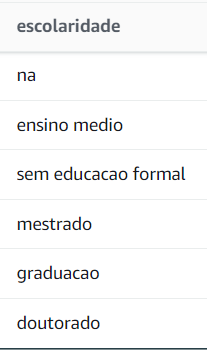

Percebe-se que há diferentes níveis de escolaridade entre os clientes, e valores nulos (indicados por 'na') no dataset.

**Quais são os tipos de estado civil no dataset?**

**Query:** SELECT DISTINCT <br /> estado_civil <br /> FROM credito

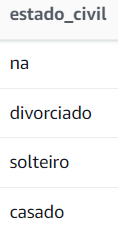

Há também divorciados dentre os clientes, além de valores nulos novamente.

**Quais são as categorias de salário anual disponíveis no dataset e quantos se encaixam em cada categoria?**

**Query:** 

SELECT DISTINCT <br /> salario_anual <br /> FROM credito

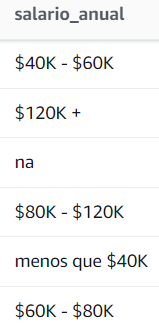

Aqui estão as faixas salariais em que os clientes se encaixam, e novamente vemos que alguns deles não têm dados disponíveis nessa coluna.

**Quais são os tipos de cartão de crédito disponíveis no dataset?**

**Query:** 

SELECT DISTINCT <br /> tipo_cartao <br /> FROM credito

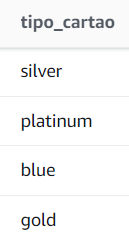

Os clientes possuem 4 tipos de cartões diferentes (blue, silver, gold e platinum), e não há valores nulos nesse caso.

## **Análise Exploratória de Dados**

Agora que já temos uma ideia dos tipos de dados que existem no banco de dados, iremos analisar mais a fundo os dados e as relações entre eles, formulando sínteses estatísticas e técnicas de visualização para identificar insights sobre tendências, formulando hipóteses e fazendo suposições nas análises. Iremos responder algumas perguntas que serão mostradas abaixo e que nos levarão a insights interessantes sobre os dados.

**Qual é a quantidade de clientes em cada faixa salarial?**

**Query:** 

SELECT <br /> count(*) as quantidade_faixa, <br /> salario_anual <br /> FROM credito <br /> GROUP BY salario_anual


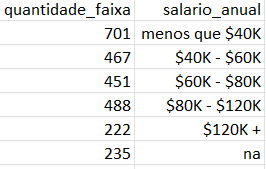

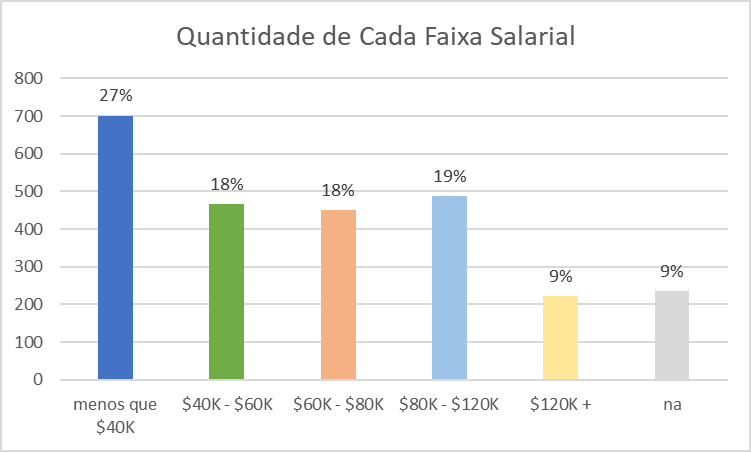

A maior faixa salarial corresponde aos clientes que ganham menos de $40K, o que faz sentido, uma vez que é mais comum salários menores que maiores. Porém percebe-se que há um problema de levantamento de dados, já que 9% dos dados totais de faixa salarial são desconhecidos, o que pode impactar no aumento ou diminuição do percentual das faixas salariais.

Pode ser interessante para o gestor de banco de dados investir em produtos que estejam relacionados ao maior consumo do público de mais baixa renda (menos que $40K).

**Qual a quantidade de clientes em cada faixa de escolaridade?**


**Query:** 

SELECT <br /> count(*) <br /> as qtd_escolaridade, <br /> escolaridade <br /> FROM credito <br /> GROUP BY Escolaridade

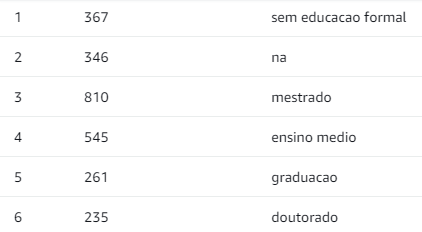

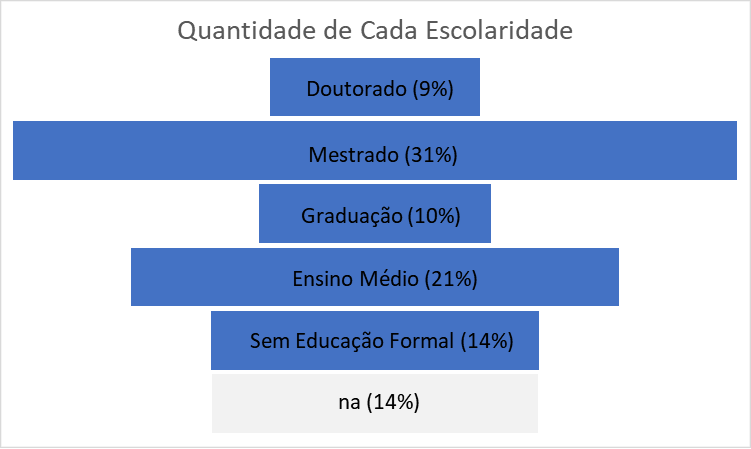

**A maioria dos clientes que fizeram compras estão entre os que concluíram mestrado**, o que demandaria entender melhor os hábitos de consumo dessa faixa de escolaridade, ou seja, quais foram os produtos comprados por eles para investir em maior estoque ou novos produtos. Porém chamo atenção para esse gráfico representativo: ele foi escolhido para ser em forma de pirâmide, já que é de senso comum de que as há mais pessoas com níveis de menor formação em geral. Não é o que ocorre, uma vez que vemos maiores proporções de clientes com mestrado e ensino médio. 

Isso pode ter sido causado por algum comportamento específico de compra apenas para esses clientes de escolaridade mestrado e ensino médio ou pelo viés do espaço amostral, lembrando que ele foi limitado por questões econômicas no AWS.

Além disso, novamente os dados não informados, caso fossem dados representativos, poderiam mudar os valores de porcentagem das outras faixas de escolaridade, e a frequência entre elas, alterando o formato do gráfico.

**Qual será o valor das transações em um ano  dos clientes com diferentes tipos de escolaridade? Existe alguma diferença de quartis, medianas e outliers para eles?**

**Query:** 

SELECT <br /> idade, <br /> sexo, <br /> dependentes, <br /> escolaridade, <br /> estado_civil, <br /> salario_anual, <br /> tipo_cartao, valor_transacoes_12m, <br /> qtd_transacoes_12m, <br /> limite_credito <br /> FROM credito 

Esses resultados foram plotados em um gráfico usando linguagem python e pacotes seaborn e pandas, sendo separados por diferentes tipos de escolaridade. O resultado é o seguinte:

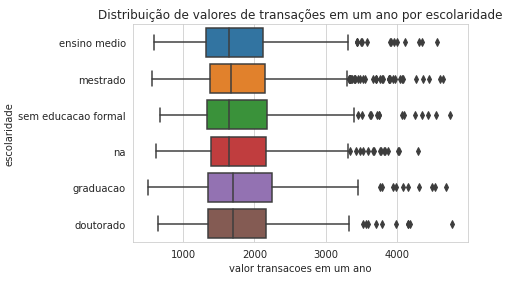

A mediana de valores de transações em um ano para todos os graus de escolaridade se manteve **próximo a 1800 dólares**. Há pouquíssima variação de distribuição entre quartis e limites superiores e inferiores também. 

A distribuição de valores de outliers têm uma leve variação, mas todas as faixas de estado civil chegam até a quase 5000 dólares, com exceção do grupo 'na'.

É possível que a escolaridade não esteja ligada ao desejo de compras de maiores valores, ou pelo menos não é possível perceber diferenças de distribuições de valores de compras relacionadas a escolaridade. **Vamos testar a renda, ou melhor, o salário anual??**

**Qual o valor de transações em um ano para clientes com diferentes faixas de salários anuais?**

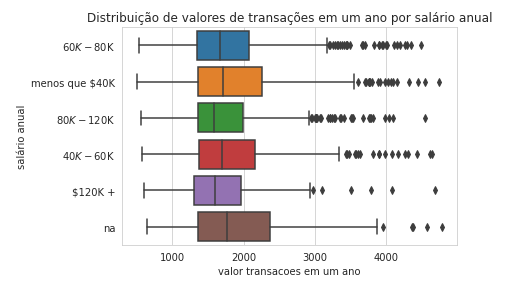

Nota-se agora uma mudança nos gráficos de boxplot, com uma leve variação entre medianas e terceiro quartis.

As faixas salariais **'menos que $40K'**, **'40k-60k'** e **'na'** apresentam valores mais altos no limite superior (ou máximo, desconsiderando outliers), variando entre 3300 a 3900 aproximadamente, o que indica uma alta variação de valores de transações em um ano. **Os consumidores que se encaixam nesses perfis precisam ter seus padrões de consumo analisados mais a fundo, uma vez que eles têm maior disposição para fazerem compras mais altas**.

Deve-se também ter atenção especial para os dados 'na', uma vez que eles apresentam um salário anual desconhecido, mas também têm potencial para compras de mais alto valor.

**Qual a quantidade de cada estado civil?**

**Query:** 

SELECT <br /> count(*) as qtd_estado_civil, <br /> estado_civil <br /> FROM credito <br /> GROUP BY estado_civil

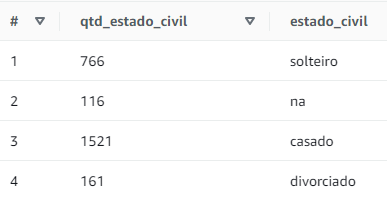

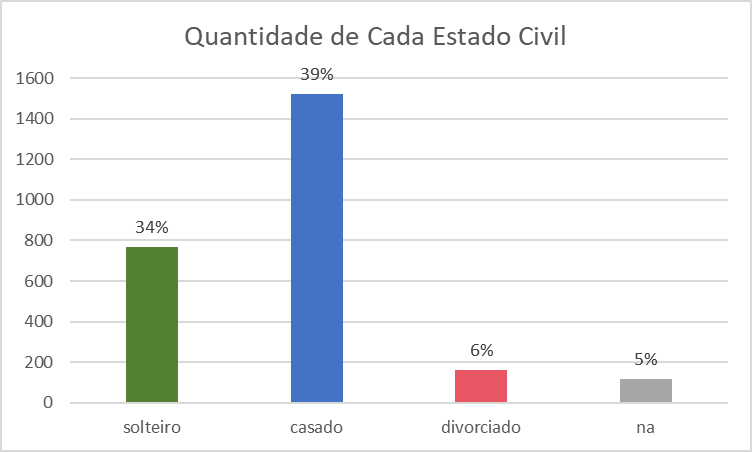

Nota-se que, dentre os clientes do banco de dados que fizeram transações, estão em maior quantidade os clientes casados. Podemos fazer uma análise mais detalhada a fim de entender o perfil desse tipo de consumidor.

**Qual o valor de transações em um ano para diferentes estados civis?**

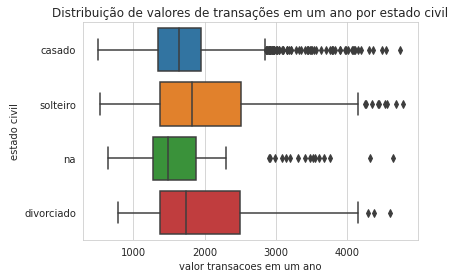

Agora a maior disposição para compras com valores mais altos encontra-se relacionada a clientes **solteiros** e **divorciados**, mesmo que a maior quantidade de clientes seja de casados. Clientes solteiros e divorciados devem ter seus perfis de compra estudados para que a empresa alinhe as expectativas a fim de disponibilizar novos produtos que os atendam, ou aumentar a quantidade dos que já existem e são mais comprados por eles.

**E o valor das transações por sexo?**

**Query:** 

SELECT <br /> count(*) AS qntd_sexo, <br /> sexo <br /> FROM credito <br /> GROUP BY sexo

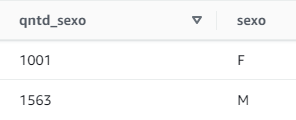

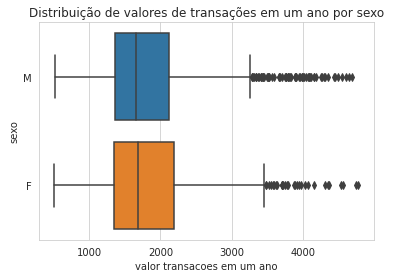

Mesmo que as **mulheres** sejam minoria dentre os clientes (**39%**), é possível notar o limite superior atingindo valores de compra ligeiramente maiores, aproximadamente 3500 dólares, o que mostra um potencial de compra maior que o dos homens.

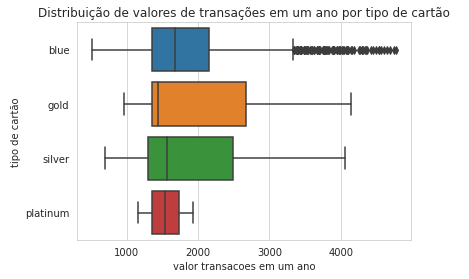

A ordem de qualidade dos cartões é blue, silver, gold e platinum, do pior para o melhor, em questão de benefícios e oferta de limite de crédito.

Apesar disso, vemos os cartões blue atingindo valores de compra altos em outliers, o que é contraditório, em relação a outros tipos de cartões.

Outro fato contraditório é cartões platinum com baixas variações de valores de compra, atingindo entre 1200 a 1950 dólares aproximadamente, muito abaixo dos outros tipos de cartões considerados piores.

Os clientes com cartões gold e silver têm maior potencial de compra para valores mais altos (até 4000 dólares).

**Por que os cartões platinum apresentam baixa variação de valor de compra?**

**Query:** 

SELECT <br /> COUNT(*) as qtde_cartao, <br /> tipo_cartao <br /> FROM credito <br /> GROUP BY tipo_cartao

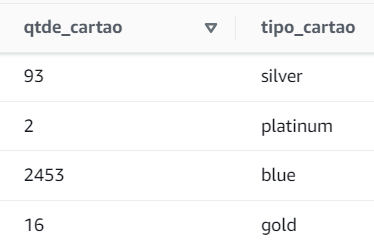

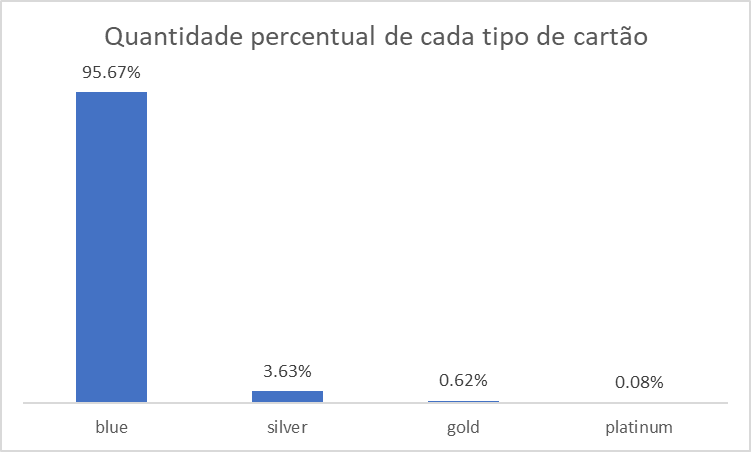

Eles apresentam baixo valor de transações em um ano devido ao viés de pequeno espaço amostral, já que há apenas 2 amostras de clientes com cartões platinum (0,08% do total).

A quantidade de clientes com cartões blue é bastante expressiva, porém os clientes com cartões silver e gold apresentaram alta variabilidade nos valores de transações, com valores mais altos no limite superior no gráfico anterior.

**Conclusões**

1) clientes que ganham abaixo de 40K anualmente estão entre os clientes que mais realizaram transações;

2) A maioria dos clientes têm como último grau de escolaridade mestrado concluído (31%), porém escolaridade não é um fator preponderante para entender perfis de compras de mais alto valor;

3) Clientes de faixas salariais ‘menos que 40k’, ’40k-60k’ e ‘na’ apresentam alta variação no valor de compra e valores mais altos de compra;

4) A maioria dos clientes são casados (39%), porém os clientes que têm maior disposição para compras de mais elevado valor são solteiros e divorciados;

5) Apesar de serem minoria (39% do total), mulheres atingiram valores de compra ligeiramente maiores que homens;

6) Clientes com cartão blue estão presentes em maior quantidade (95,67%), porém clientes com cartões gold e silver apresentaram perfis de compras anuais de maiores valores (até 4000 dólares);

7) Clientes de cartões platinum não têm boa representatividade no banco de dados, já que são apenas 0,08% do total.


**Recomendações**

1) Investir em clientes que ganham abaixo de 40k anualmente, assim como na faixa de '40k-60k', clientes solteiros, divorciados, mulheres, clientes com cartões gold e silver.

2) Melhorar as informações do banco de dados e reduzir ou eliminar dados 'na'.

3) Tentar usar todos os dados sem o recorte devido ao preço de processamento.

Caso queira entrar em contato:

[Linkedin](https://www.linkedin.com/in/andressa-yumi-portella/)

ayportella@gmail.com


Andressa Yumi Portella